In [ ]:
%cd /content/drive/MyDrive/Final_Project

/content/drive/MyDrive/Final_Project


# 1. Data Volume

In [ ]:
from glob import glob
import os

def check_folder_len(path):
  folders = sorted(os.listdir(path))
  # 폴더별 데이터 개수
  folders_len = []
  for folder in folders:
    path_folder = os.path.join(path, folder)
    length = len(os.listdir(path_folder))
    print(f'{folder} data length : {length}' )
    folders_len.append(length)

  return folders_len

In [ ]:
print('Training')
train_len = check_folder_len('./Train_data/')
print('-----------'*10)
print('Validation')
valid_len = check_folder_len('./Validation')

Training
[원천]모낭사이홍반_0.양호 data length : 534
[원천]모낭사이홍반_1.경증 data length : 29960
[원천]모낭사이홍반_2.중등도 data length : 12957
[원천]모낭사이홍반_3.중증 data length : 4275
[원천]모낭홍반농포_0.양호 data length : 534
[원천]모낭홍반농포_1.경증 data length : 2126
[원천]모낭홍반농포_2.중등도 data length : 758
[원천]모낭홍반농포_3.중증 data length : 332
[원천]미세각질_0.양호 data length : 534
[원천]미세각질_1.경증 data length : 4435
[원천]미세각질_2.중등도 data length : 5486
[원천]미세각질_3.중증 data length : 2284
[원천]비듬_0.양호 data length : 541
[원천]비듬_1 data length : 16560
[원천]비듬_2.중등도 data length : 9523
[원천]비듬_3.중증 data length : 2256
[원천]탈모_0.양호 data length : 534
[원천]탈모_1.경증 data length : 13346
[원천]탈모_2.중등도 data length : 3797
[원천]탈모_3.중증 data length : 836
[원천]피지과다_0.양호 data length : 534
[원천]피

In [ ]:
import pandas as pd

df_train = pd.DataFrame(dict(folder_name = sorted(os.listdir('Train_data')), folder_length = train_len))
df_valid = pd.DataFrame(dict(folder_name = sorted(os.listdir('Validation')), folder_length = valid_len))

In [ ]:
df_merge = pd.merge(df_train, df_valid, on='folder_name').sort_values('folder_name')
df_merge.columns = ['folder_name', 'train_len', 'valid_len']
df_merge['valid/train'] = round(df_merge.valid_len / df_merge.train_len, 2)
df_merge

,folder_name,train_len,valid_len,valid/train
0,[원천]모낭사이홍반_0.양호,534,152,0.28
1,[원천]모낭사이홍반_1.경증,29960,8560,0.29
2,[원천]모낭사이홍반_2.중등도,12957,3702,0.29
3,[원천]모낭사이홍반_3.중증,4275,1221,0.29
4,[원천]모낭홍반농포_0.양호,534,152,0.28
5,[원천]모낭홍반농포_1.경증,2126,607,0.29
6,[원천]모낭홍반농포_2.중등도,758,216,0.28
7,[원천]모낭홍반농포_3.중증,332,95,0.29
8,[원천]미세각질_0.양호,534,152,0.28
9,[원천]미세각질_1.경증,4435,1267,0.29


In [ ]:
# 데이터 총 개수
df_merge.train_len.sum() + df_merge.valid_len.sum()

195259

In [ ]:
# 메타데이터 개수
len(os.listdir('./Meta'))

101028

# 2. Image Data

folder name : ./Validation/[원천]모낭사이홍반_0.양호
file name : 7297_A2LEBJJDE00151I_1606701309614_4_LH.jpg
(640, 480)


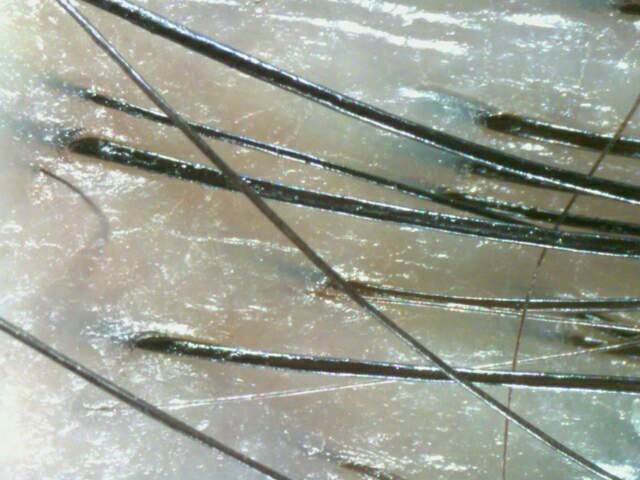

In [ ]:
from PIL import Image

folder = glob('./Validation/*_0*')[6]
fname = os.listdir(folder)[0]
print('folder name :', folder)
print('file name :', fname)

# 이미지 열기
im = Image.open(os.path.join(folder, fname))
 
# 이미지 크기 출력
print(im.size)
im

# 3. Label, Meta Data

In [ ]:
import json
from pprint import pprint

path = './Validation/[라벨]모낭홍반농포_0.양호/'
fname = '7297_A2LEBJJDE00151I_1606701309614_4_LH.json'

with open(path + fname, 'r') as f:
  json_label = json.load(f)

print('Label Data')
pprint(json_label)


path = './Meta/'
fname = '7297_A2LEBJJDE00151I_1606701309614_4_LH_META.json'

with open(path + fname, 'r') as f:
  json_meta = json.load(f)

print('Meta Data')
pprint(json_meta)

Label Data
{'image_file_name': '7297_A2LEBJJDE00151I_1606701309614_4_LH.jpg',
 'image_id': '7297_A2LEBJJDE00151I_1606701309614_4',
 'value_1': '0',
 'value_2': '0',
 'value_3': '0',
 'value_4': '0',
 'value_5': '0',
 'value_6': '0'}
Meta Data
{'age': '20대',
 'answers1': '1일 1회',
 'answers2': '1~3회/연',
 'answers3': '1~3회/연',
 'answers4': '염색 모발',
 'answers5': '샴푸,린스',
 'answers6': '예',
 'answers7': '가격',
 'gender': '여',
 'location': 'LH',
 'question1': '샴푸 사용 빈도',
 'question2': '펌 주기',
 'question3': '염색 주기 (자가 염색 포함)',
 'question4': '현재 모발 상태',
 'question5': '현재 사용하고 있는 두피모발용 제품',
 'question6': '맞춤두피케어 제품사용을 희망(선호)하시나요',
 'question7': '샴푸 구매시 중요시 고려하는 부분은 무엇인가요?'}
